<a href="https://colab.research.google.com/github/syq-tju/optimization/blob/main/QuadraticInterpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

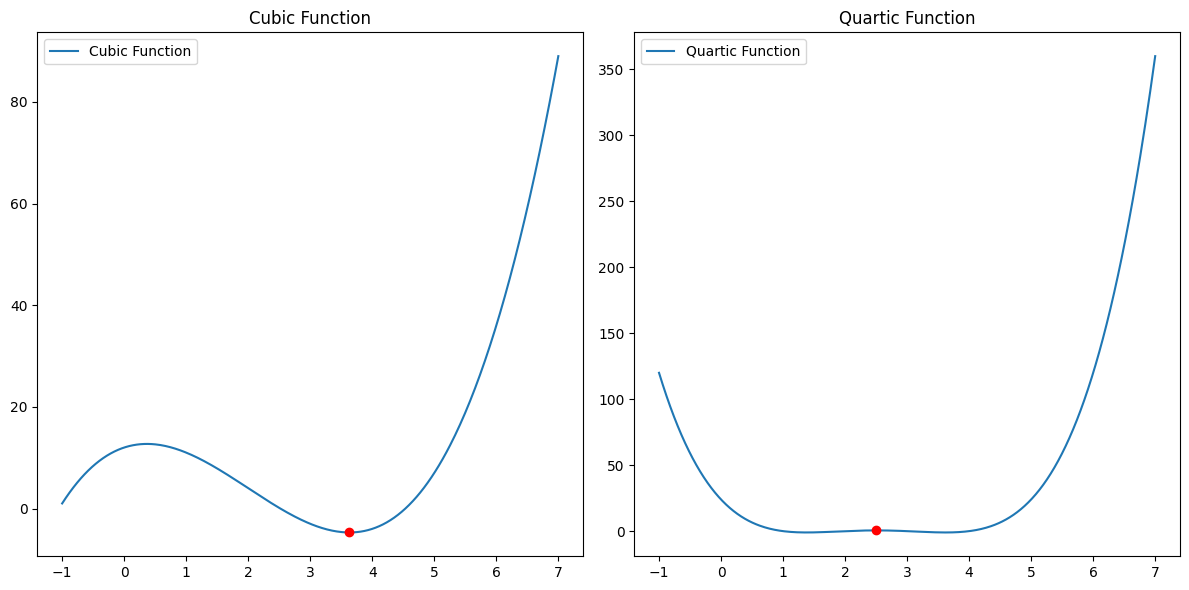

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_function(x):
    return x**3 - 6*x**2 + 4*x + 12

def quartic_function(x):
    return x**4 - 10*x**3 + 35*x**2 - 50*x + 24

def quadratic_interpolation(f, x1, x2, x3, tol=1e-5, max_iter=100):
    iter_count = 0
    while abs(x3 - x1) > tol and iter_count < max_iter:
        f1, f2, f3 = f(x1), f(x2), f(x3)
        denom = (x1 - x2) * (x1 - x3) * (x2 - x3)
        a = (x3 * (f2 - f1) + x2 * (f1 - f3) + x1 * (f3 - f2)) / denom
        b = (x3**2 * (f1 - f2) + x2**2 * (f3 - f1) + x1**2 * (f2 - f3)) / denom
        x_min = -b / (2 * a)

        x1, x2, x3 = x2, x3, x_min
        iter_count += 1

    return x_min, f(x_min)

# 设置初始点
x1, x2, x3 = 0, 3, 6

# 对三次函数和四次函数应用二次插值法
cubic_min_x, cubic_min_f = quadratic_interpolation(cubic_function, x1, x2, x3)
quartic_min_x, quartic_min_f = quadratic_interpolation(quartic_function, x1, x2, x3)

# 绘图参数设置
x_range = np.linspace(-1, 7, 400)
cubic_y = cubic_function(x_range)
quartic_y = quartic_function(x_range)

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制三次函数和最小值点
axes[0].plot(x_range, cubic_y, label='Cubic Function')
axes[0].scatter(cubic_min_x, cubic_min_f, color='red', zorder=5)
axes[0].title.set_text('Cubic Function')
axes[0].legend()

# 绘制四次函数和最小值点
axes[1].plot(x_range, quartic_y, label='Quartic Function')
axes[1].scatter(quartic_min_x, quartic_min_f, color='red', zorder=5)
axes[1].title.set_text('Quartic Function')
axes[1].legend()

# 显示图形
plt.tight_layout()
plt.show()
